# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다. 
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV'
data = pd.read_csv(path)  
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



# 2.범주-->범주

In [5]:
target = 'Attrition'

## (1) Gender --> Attrition

In [6]:
feature = 'Gender'

* 교차표

In [7]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,403,598
1,66,129


In [8]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.859275,0.822558
1,0.140725,0.177442


* 시각화

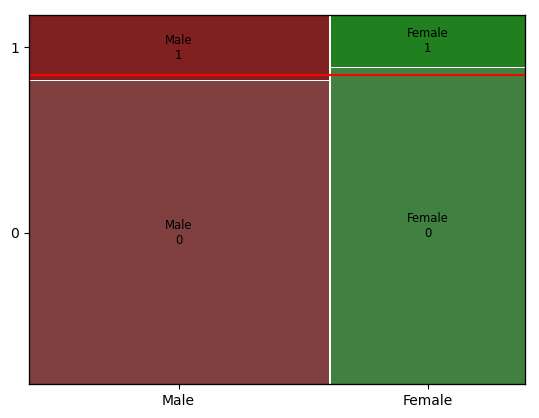

In [9]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [10]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             403   598
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.5537631338119975
p-value 0.1100318964829815
기대빈도
 [[392.5326087 608.4673913]
 [ 76.4673913 118.5326087]]


<AxesSubplot:xlabel='Attrition', ylabel='Density'>

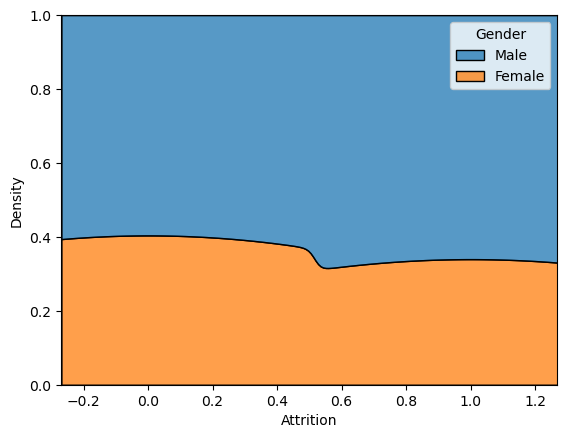

In [14]:
sns.kdeplot(x=target,data=data,hue=feature,multiple="fill")

* 파악된 내용을 기술해 봅시다.

크게 관련이 없어보이지만

## (2) JobSatisfaction --> Attrition

In [75]:
feature = "JobSatisfaction"
target = "Attrition"

* 교차표

In [77]:
display(pd.crosstab(data[target],data[feature]))
display(pd.crosstab(data[target],data[feature],normalize='index'))

JobSatisfaction,1,2,3,4
Attrition,,,,
0,191,189,295,326
1,52,37,59,47


JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.190809,0.188811,0.294705,0.325674
1,0.266667,0.189744,0.302564,0.241026


* 시각화

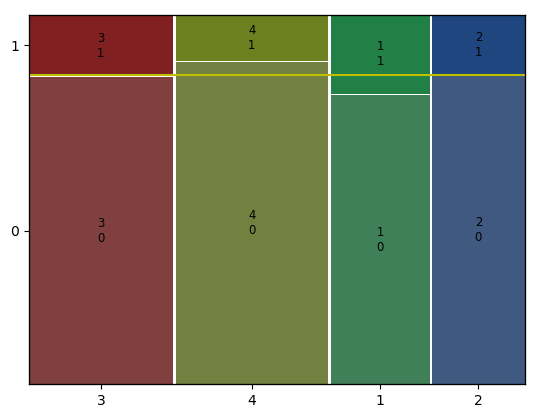

In [78]:
t1 = mosaic(data,[feature,target])
plt.axhline(1-data[target].mean(),color='y')
plt.show()

In [80]:
# 이상하다 .
#sns.kdeplot(data=data,hue=feature,x=target,multiple='fill')

* 수치화 : 카이제곱검정

In [81]:
#이상하다
#spst.chi2_contingency(t1)

* 파악된 내용을 기술해 봅시다.

만족도는 이직률에 영향을 끼치는 것 같다.

만족도가 높은 그룹은 이직률이 낮고, 낮은 그룹은 이직률이 높다.

## (3) MaritalStatus --> Attrition

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## (4) OverTime --> Attrition

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

# 3.숫자-->범주

## (1) Age --> Attrition

In [67]:
feature = 'Age'
target = 'Attrition'

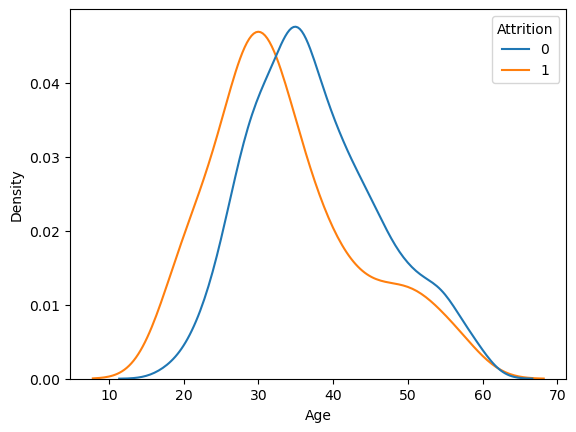

In [68]:
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False)
plt.show()

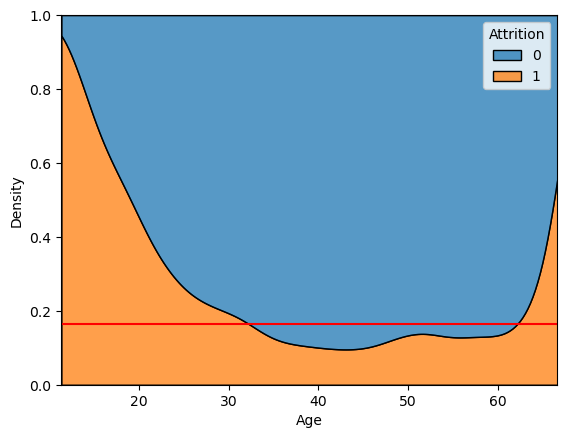

In [69]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (2) DistanceFromHome --> Attrition

In [70]:
feature = 'DistanceFromHome'

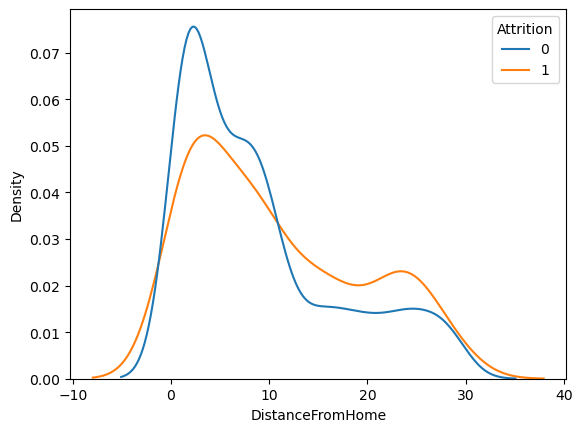

In [71]:
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False)
plt.show()

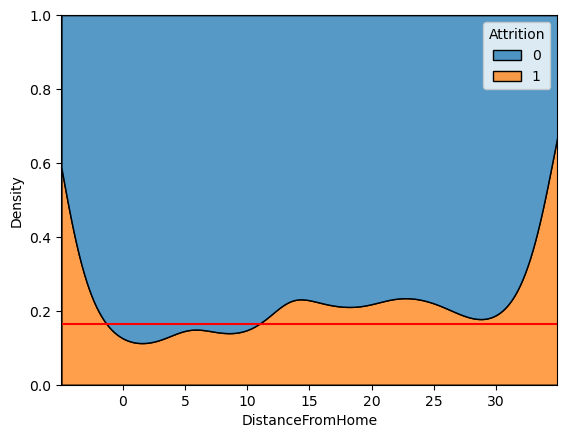

In [72]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (3) MonthlyIncome --> Attrition

* 파악된 내용을 기술해 봅시다.

## (4) PercentSalaryHike --> Attrition

* 파악된 내용을 기술해 봅시다.

## (5) TotalWorkingYears --> Attrition

* 파악된 내용을 기술해 봅시다.

# 4.관계 정리하기

① 강한관계

② 중간관계

③ 관계없음

In [86]:
path = 'https://bit.ly/3PArw4W'
data = pd.read_csv(path)
a = "tax"
b = "medv"
data.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


In [102]:
temp = data.loc[data[b].notna()]
temp[b].shape
spst.pearsonr(data[a],data[b])

(-0.4685359335677671, 5.637733627689083e-29)